In [1]:
#import các thư viện cần thiết
import numpy as np
from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [ ]:
#tải dữ liệu huấn luyện và dữ liệu đánh giá cho mô hình
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#chuẩn hóa dữ liệu
x_train = x_train.reshape(-1,28,28,1) / 255.0
x_test = x_test.reshape(-1,28,28,1) / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
#xây dựng cấu trúc mô hình
def DCNN1_model():
  #CNN layer
  model=keras.Sequential()
  model.add(keras.layers.Conv2D(64,(5,5),input_shape=(28,28,1),activation='relu'))
  model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
  model.add(keras.layers.Dropout(0.25))
  model.add(keras.layers.Conv2D(32,(3,3),activation='relu'))
  model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
  model.add(keras.layers.Dropout(0.25))

  model.add(keras.layers.Flatten())

  #MLP với 3 lớp ẩn
  model.add(keras.layers.Dense(375, activation='relu'))
  model.add(keras.layers.Dropout(0.25))
  model.add(keras.layers.Dense(225, activation='relu'))
  model.add(keras.layers.Dropout(0.25))
  model.add(keras.layers.Dense(135, activation='relu'))
  model.add(keras.layers.Dropout(0.25))
  model.add(keras.layers.Dense(10, activation='softmax'))
  model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
  return model

In [ ]:

# Huấn luyện mô hình
model = DCNN1_model()
history = model.fit(x_train, y_train, batch_size=32, epochs=30,
                    validation_split=0.1, verbose=2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
844/844 - 73s - 87ms/step - accuracy: 0.9394 - loss: 0.1910 - val_accuracy: 0.9875 - val_loss: 0.0436
Epoch 2/20
844/844 - 78s - 93ms/step - accuracy: 0.9817 - loss: 0.0604 - val_accuracy: 0.9880 - val_loss: 0.0349
Epoch 3/20
844/844 - 69s - 82ms/step - accuracy: 0.9870 - loss: 0.0444 - val_accuracy: 0.9892 - val_loss: 0.0393
Epoch 4/20
844/844 - 69s - 82ms/step - accuracy: 0.9889 - loss: 0.0373 - val_accuracy: 0.9907 - val_loss: 0.0331
Epoch 5/20
844/844 - 67s - 79ms/step - accuracy: 0.9909 - loss: 0.0304 - val_accuracy: 0.9897 - val_loss: 0.0359
Epoch 6/20
844/844 - 82s - 97ms/step - accuracy: 0.9921 - loss: 0.0274 - val_accuracy: 0.9932 - val_loss: 0.0269
Epoch 7/20
844/844 - 82s - 97ms/step - accuracy: 0.9925 - loss: 0.0242 - val_accuracy: 0.9905 - val_loss: 0.0436
Epoch 8/20
844/844 - 68s - 80ms/step - accuracy: 0.9934 - loss: 0.0232 - val_accuracy: 0.9925 - val_loss: 0.0352
Epoch 9/20
844/844 - 67s - 80ms/step - accuracy: 0.9935 - loss: 0.0217 - val_accuracy: 0.9925 - 

In [ ]:
#lưu mô hình
model.save('model_hand_digitwritten.h5')

In [ ]:
# Đánh giá mô hình
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Độ chính xác trên tập kiểm tra: {test_accuracy * 100:.2f}%")

313/313 - 3s - 9ms/step - accuracy: 0.9901 - loss: 0.0493
Độ chính xác trên tập kiểm tra: 99.01%


In [ ]:
# Dự đoán
pred = np.argmax(model.predict(x_test), axis=1)

# Hiển thị classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      0.99      1135
           2       0.99      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.97      1.00      0.98       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       1.00      0.98      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



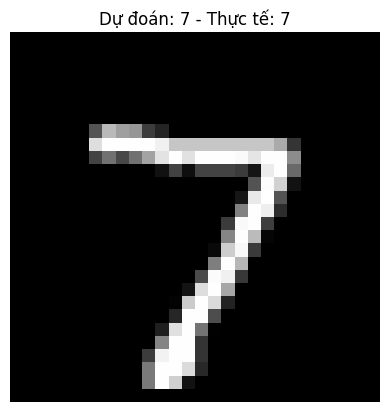

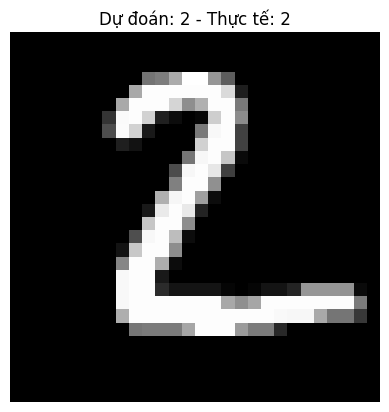

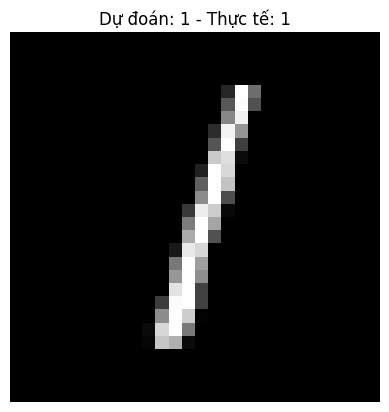

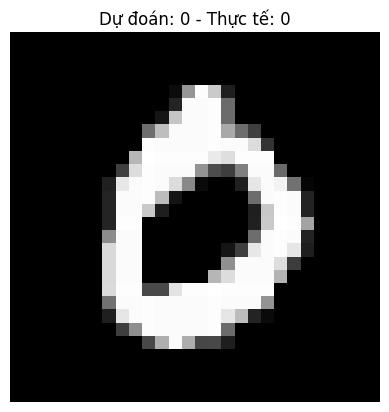

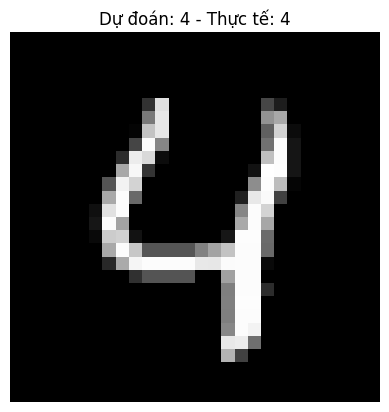

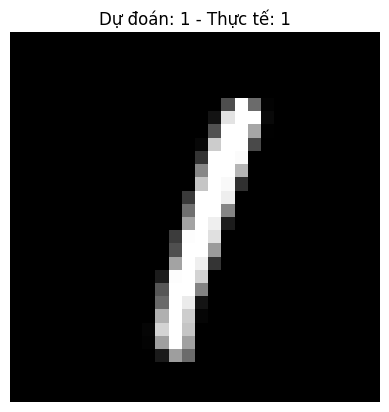

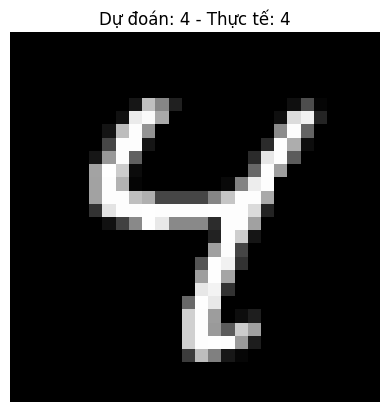

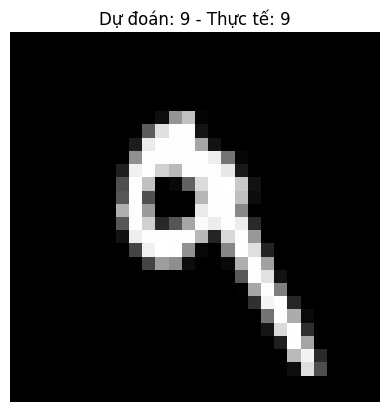

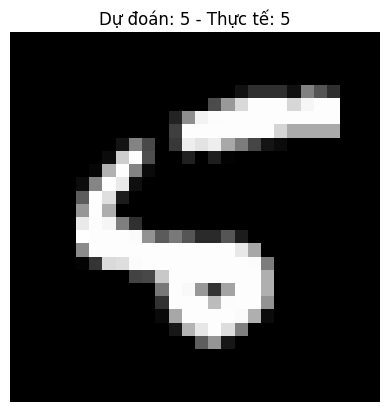

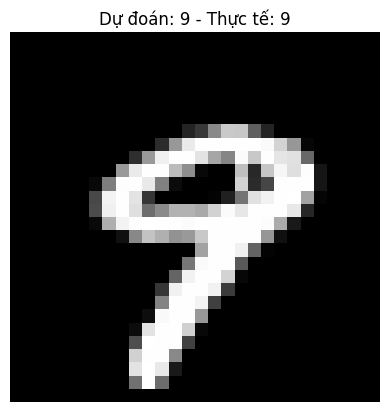

In [ ]:
import matplotlib.pyplot as plt

for i in range(10):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Dự đoán: {pred[i]} - Thực tế: {y_test[i]}")
    plt.axis('off')
    plt.show()


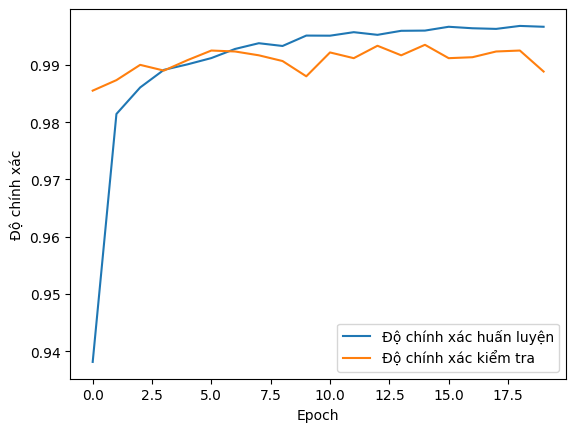

In [ ]:
# Vẽ đồ thị
plt.plot(history.history['accuracy'], label='Độ chính xác huấn luyện')
plt.plot(history.history['val_accuracy'], label='Độ chính xác kiểm tra')
plt.xlabel('Epoch')
plt.ylabel('Độ chính xác')
plt.legend()
plt.show()


In [ ]:
!pip install gradio

In [ ]:
import gradio as gr
import numpy as np
from tensorflow.keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt

# Tải mô hình đã lưu
model = load_model('model_hand_digitwritten.h5')

# Hàm nhận diện chữ số
def recognize_digit(image):
    # Tiền xử lý ảnh
    image = np.array(image.convert("L").resize((28, 28)))  # Chuyển ảnh sang grayscale và resize về (28,28)
    image = image / 255.0  # Chuẩn hóa ảnh về khoảng [0,1]
    image = np.expand_dims(image, axis=0)  # Thêm chiều batch
    image = np.expand_dims(image, axis=-1)  # Thêm chiều kênh (grayscale)

    # Dự đoán
    prediction = model.predict(image)
    predicted_digit = np.argmax(prediction)  # Lấy chữ số có xác suất cao nhất

    # Hiển thị ảnh
    plt.imshow(image[0, :, :, 0], cmap='gray')
    plt.axis('off')  # Ẩn trục
    plt.show()

    return f"Dự đoán: {predicted_digit}"

# Tạo giao diện Gradio
demo = gr.Interface(
    fn=recognize_digit,
    inputs=gr.Image(type="pil"),
    outputs="text",
    title="Nhận diện chữ số viết tay",
    description="Tải lên ảnh chứa chữ số viết tay (0-9) để nhận diện."
)

# Chạy ứng dụng
if __name__ == "__main__":
    demo.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://a70ab69507968ecf33.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
